In [633]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data

import torchvision.models as models
from collections import OrderedDict

import time
import pickle
import pandas
import numpy as np 
import matplotlib.pyplot as plt   
import scipy.stats as st

import W2reg_core as W2Rcore
import W2reg_misc as W2Rmisc

import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Load pre-treated MNIST data.** 

The treatments make the predictions $y$ biased with respect to the variable $S$ (see the JMIV 2022 paper). 

In [634]:
#Data loading
X_bw=pickle.load(open("X_bw_np_32186", 'rb'))
X_bw_nogen=pickle.load(open("X_bw_nogen_np_32186","rb"))
Titles_=pickle.load(open("Titles_np_32186","rb"))
Gen_=pickle.load(open("Gen_np_32186","rb"))

In [635]:
n=32186

Gen_=Gen_[:n]
Titles_=Titles_[:n]
X_bw=X_bw[:n]
X_bw_nogen=X_bw_nogen[:n]

Titles=[]
Gen=[]
for i in range(len(Titles_)):
    if Titles_[i]=="nurse" :
        Titles.append([1])
    else :
        Titles.append([0])
    if Gen_[i]=="F":
        Gen.append(1)
    else :
        Gen.append(0)

In [636]:
Gen =torch.FloatTensor(Gen)
Titles = torch.FloatTensor(Titles) 
X_bw=torch.FloatTensor(X_bw.values.tolist())
X_bw_nogen=torch.FloatTensor(X_bw_nogen.values.tolist())


X_bw_train, X_bw_test, X_bw_nogen_train, X_bw_nogen_test, Titles_train, Titles_test, Gen_train, Gen_test = train_test_split(X_bw, X_bw_nogen, Titles, Gen, test_size = 0.4, random_state=0)



## With gender information

In [637]:
#parametres
input_size = len(X_bw_train[0])
opti_lr = 1e-3 #le pas d'apprentissage

In [638]:
class Logistic_Reg_model(torch.nn.Module):
    def __init__(self,input_dim):
        super(Logistic_Reg_model,self).__init__()
        self.layer1=torch.nn.Linear(input_dim,1)
    def forward(self,x):
        y_predicted=torch.sigmoid(self.layer1(x))
        return y_predicted

**Training phase with or without the W2 regulatization.**

Run training - without reg
epoch 0 -- batchNb 1: 0.25357324 0.0 --  lambda=0.0
epoch 0 -- batchNb 2: 0.24833816 0.0 --  lambda=0.0
epoch 0 -- batchNb 3: 0.23759066 0.0 --  lambda=0.0
epoch 0 -- batchNb 4: 0.23843208 0.0 --  lambda=0.0
epoch 0 -- batchNb 5: 0.2265817 0.0 --  lambda=0.0
epoch 0 -- batchNb 6: 0.23372212 0.0 --  lambda=0.0
epoch 0 -- batchNb 7: 0.21675013 0.0 --  lambda=0.0
epoch 0 -- batchNb 8: 0.21449308 0.0 --  lambda=0.0
epoch 0 -- batchNb 9: 0.2129648 0.0 --  lambda=0.0
epoch 0 -- batchNb 10: 0.20990497 0.0 --  lambda=0.0
epoch 0 -- batchNb 11: 0.20829855 0.0 --  lambda=0.0
epoch 0 -- batchNb 12: 0.20491388 0.0 --  lambda=0.0
epoch 0 -- batchNb 13: 0.19570549 0.0 --  lambda=0.0
epoch 0 -- batchNb 14: 0.18996087 0.0 --  lambda=0.0
epoch 0 -- batchNb 15: 0.19164644 0.0 --  lambda=0.0
epoch 0 -- batchNb 16: 0.1920409 0.0 --  lambda=0.0
epoch 0 -- batchNb 17: 0.18841395 0.0 --  lambda=0.0
epoch 0 -- batchNb 18: 0.17535965 0.0 --  lambda=0.0
epoch 0 -- batchNb 19: 0.184165

epoch 2 -- batchNb 74: 0.07594239 0.0 --  lambda=0.0
epoch 2 -- batchNb 75: 0.05742939 0.0 --  lambda=0.0
epoch 2 -- batchNb 76: 0.060693197 0.0 --  lambda=0.0
epoch 2 -- batchNb 77: 0.062267527 0.0 --  lambda=0.0
epoch 2 -- batchNb 78: 0.07423029 0.0 --  lambda=0.0
epoch 2 -- batchNb 79: 0.06572622 0.0 --  lambda=0.0
epoch 2 -- batchNb 80: 0.0684453 0.0 --  lambda=0.0
epoch 2 -- batchNb 81: 0.088772126 0.0 --  lambda=0.0
epoch 2 -- batchNb 82: 0.06472134 0.0 --  lambda=0.0
epoch 2 -- batchNb 83: 0.051667467 0.0 --  lambda=0.0
epoch 2 -- batchNb 84: 0.0526012 0.0 --  lambda=0.0
epoch 2 -- batchNb 85: 0.062125865 0.0 --  lambda=0.0
epoch 2 -- batchNb 86: 0.057662673 0.0 --  lambda=0.0
epoch 2 -- batchNb 87: 0.0706042 0.0 --  lambda=0.0
epoch 2 -- batchNb 88: 0.065379456 0.0 --  lambda=0.0
epoch 2 -- batchNb 89: 0.06490622 0.0 --  lambda=0.0
epoch 2 -- batchNb 90: 0.068418205 0.0 --  lambda=0.0
epoch 2 -- batchNb 91: 0.053586178 0.0 --  lambda=0.0
epoch 2 -- batchNb 92: 0.050105132 0.0 -

epoch 5 -- batchNb 64: 0.048984528 0.0 --  lambda=0.0
epoch 5 -- batchNb 65: 0.0526136 0.0 --  lambda=0.0
epoch 5 -- batchNb 66: 0.042788 0.0 --  lambda=0.0
epoch 5 -- batchNb 67: 0.049702283 0.0 --  lambda=0.0
epoch 5 -- batchNb 68: 0.03926361 0.0 --  lambda=0.0
epoch 5 -- batchNb 69: 0.044362277 0.0 --  lambda=0.0
epoch 5 -- batchNb 70: 0.061365116 0.0 --  lambda=0.0
epoch 5 -- batchNb 71: 0.04872025 0.0 --  lambda=0.0
epoch 5 -- batchNb 72: 0.04897994 0.0 --  lambda=0.0
epoch 5 -- batchNb 73: 0.049062543 0.0 --  lambda=0.0
epoch 5 -- batchNb 74: 0.060598947 0.0 --  lambda=0.0
epoch 5 -- batchNb 75: 0.049625754 0.0 --  lambda=0.0
epoch 5 -- batchNb 76: 0.039966136 0.0 --  lambda=0.0
epoch 5 -- batchNb 77: 0.056859408 0.0 --  lambda=0.0
epoch 5 -- batchNb 78: 0.058535043 0.0 --  lambda=0.0
epoch 5 -- batchNb 79: 0.038509574 0.0 --  lambda=0.0
epoch 5 -- batchNb 80: 0.04397496 0.0 --  lambda=0.0
epoch 5 -- batchNb 81: 0.03893575 0.0 --  lambda=0.0
epoch 5 -- batchNb 82: 0.0485379 0.0 -

Run training - with reg
epoch 0 -- batchNb 1: 0.23156622 0.0001896890902702648 --  lambda=0.0005
epoch 0 -- batchNb 2: 0.23717503 0.0002871323497500898 --  lambda=0.0005
epoch 0 -- batchNb 3: 0.22913279 0.00033566901998582406 --  lambda=0.0005
epoch 0 -- batchNb 4: 0.22398035 0.0008797886916028399 --  lambda=0.0005
epoch 0 -- batchNb 5: 0.225346 0.0012783952540888187 --  lambda=0.0005
epoch 0 -- batchNb 6: 0.2147439 0.0028787580161851217 --  lambda=0.0005
epoch 0 -- batchNb 7: 0.21309437 0.001222823003548908 --  lambda=0.0005
epoch 0 -- batchNb 8: 0.21112871 0.0026505191085908547 --  lambda=0.0005
epoch 0 -- batchNb 9: 0.204436 0.005623527154004557 --  lambda=0.0005
epoch 0 -- batchNb 10: 0.20658146 0.00522755565188375 --  lambda=0.0005
epoch 0 -- batchNb 11: 0.20464276 0.00659886294634973 --  lambda=0.0005
epoch 0 -- batchNb 12: 0.19918638 0.007656436048650112 --  lambda=0.0005
epoch 0 -- batchNb 13: 0.19355719 0.0042894888877928 --  lambda=0.0005
epoch 0 -- batchNb 14: 0.18603824 0.0

epoch 1 -- batchNb 19: 0.107474186 0.09412927955069561 --  lambda=0.0005
epoch 1 -- batchNb 20: 0.10261477 0.10153648235013467 --  lambda=0.0005
epoch 1 -- batchNb 21: 0.10809955 0.0885300342048736 --  lambda=0.0005
epoch 1 -- batchNb 22: 0.103021376 0.12401739622116366 --  lambda=0.0005
epoch 1 -- batchNb 23: 0.114049494 0.09684271435995216 --  lambda=0.0005
epoch 1 -- batchNb 24: 0.102109715 0.10782522108394077 --  lambda=0.0005
epoch 1 -- batchNb 25: 0.100977294 0.11352745410828599 --  lambda=0.0005
epoch 1 -- batchNb 26: 0.10691866 0.08891741618180797 --  lambda=0.0005
epoch 1 -- batchNb 27: 0.10255831 0.09670762694166263 --  lambda=0.0005
epoch 1 -- batchNb 28: 0.11247542 0.1427541402318592 --  lambda=0.0005
epoch 1 -- batchNb 29: 0.10198061 0.1069266528134563 --  lambda=0.0005
epoch 1 -- batchNb 30: 0.10572365 0.09241970871625954 --  lambda=0.0005
epoch 1 -- batchNb 31: 0.11250849 0.09287072621087686 --  lambda=0.0005
epoch 1 -- batchNb 32: 0.10034057 0.13591083351038594 --  lamb

epoch 2 -- batchNb 42: 0.110284366 0.12963322286244683 --  lambda=0.0005
epoch 2 -- batchNb 43: 0.10404 0.11064855212230786 --  lambda=0.0005
epoch 2 -- batchNb 44: 0.09221388 0.10261072167399923 --  lambda=0.0005
epoch 2 -- batchNb 45: 0.09719402 0.15598338160200642 --  lambda=0.0005
epoch 2 -- batchNb 46: 0.098087676 0.11005266738458806 --  lambda=0.0005
epoch 2 -- batchNb 47: 0.096849896 0.10990210851351186 --  lambda=0.0005
epoch 2 -- batchNb 48: 0.10069645 0.10256332586449778 --  lambda=0.0005
epoch 2 -- batchNb 49: 0.09803405 0.0930358840603814 --  lambda=0.0005
epoch 2 -- batchNb 50: 0.09385418 0.13608389031473955 --  lambda=0.0005
epoch 2 -- batchNb 51: 0.10676459 0.09076666393027515 --  lambda=0.0005
epoch 2 -- batchNb 52: 0.09489465 0.14108105399364482 --  lambda=0.0005
epoch 2 -- batchNb 53: 0.10841081 0.06479636579457604 --  lambda=0.0005
epoch 2 -- batchNb 54: 0.102472536 0.09276208584222893 --  lambda=0.0005
epoch 2 -- batchNb 55: 0.09789592 0.09610104675368643 --  lambda

epoch 3 -- batchNb 64: 0.098519914 0.07306692442651845 --  lambda=0.0005
epoch 3 -- batchNb 65: 0.09828935 0.10603088162193998 --  lambda=0.0005
epoch 3 -- batchNb 66: 0.09947273 0.0937248952282198 --  lambda=0.0005
epoch 3 -- batchNb 67: 0.114483014 0.13722079935254375 --  lambda=0.0005
epoch 3 -- batchNb 68: 0.09180669 0.14343300788690053 --  lambda=0.0005
epoch 3 -- batchNb 69: 0.10185255 0.13791593562416218 --  lambda=0.0005
epoch 3 -- batchNb 70: 0.0962236 0.13265794399812977 --  lambda=0.0005
epoch 3 -- batchNb 71: 0.09856054 0.1379478582299338 --  lambda=0.0005
epoch 3 -- batchNb 72: 0.10430755 0.12674370090498982 --  lambda=0.0005
epoch 3 -- batchNb 73: 0.0968845 0.14358374038736424 --  lambda=0.0005
epoch 3 -- batchNb 74: 0.098130964 0.09509264677535612 --  lambda=0.0005
epoch 3 -- batchNb 75: 0.09615475 0.14537745026901222 --  lambda=0.0005
epoch 3 -- batchNb 76: 0.100266665 0.1253498964091216 --  lambda=0.0005
epoch 3 -- batchNb 77: 0.103159964 0.08711578914763544 --  lambda

epoch 4 -- batchNb 83: 0.09867844 0.1401499651099208 --  lambda=0.0005
epoch 4 -- batchNb 84: 0.102004796 0.12327853224536178 --  lambda=0.0005
epoch 4 -- batchNb 85: 0.107679024 0.1049995695002436 --  lambda=0.0005
epoch 4 -- batchNb 86: 0.101741105 0.092786115944837 --  lambda=0.0005
epoch 4 -- batchNb 87: 0.09945658 0.1217629303796382 --  lambda=0.0005
epoch 4 -- batchNb 88: 0.09592827 0.07750209168420011 --  lambda=0.0005
epoch 4 -- batchNb 89: 0.084861815 0.0794472326290709 --  lambda=0.0005
epoch 4 -- batchNb 90: 0.09619128 0.12212670276109779 --  lambda=0.0005
epoch 4 -- batchNb 91: 0.09528708 0.12457407023931444 --  lambda=0.0005
epoch 4 -- batchNb 92: 0.0995165 0.14718345579478506 --  lambda=0.0005
epoch 4 -- batchNb 93: 0.08547191 0.1362469951418623 --  lambda=0.0005
epoch 4 -- batchNb 94: 0.09237362 0.11302239949172509 --  lambda=0.0005
epoch 4 -- batchNb 95: 0.10131069 0.09852568413018903 --  lambda=0.0005
epoch 4 -- batchNb 96: 0.09429548 0.1058539918813219 --  lambda=0.00

epoch 6 -- batchNb 11: 0.08786392 0.14620974949682827 --  lambda=0.0005
epoch 6 -- batchNb 12: 0.098380715 0.12641995130440636 --  lambda=0.0005
epoch 6 -- batchNb 13: 0.10001922 0.13294627399075715 --  lambda=0.0005
epoch 6 -- batchNb 14: 0.094661474 0.14287388864408893 --  lambda=0.0005
epoch 6 -- batchNb 15: 0.09925723 0.15954199848700368 --  lambda=0.0005
epoch 6 -- batchNb 16: 0.09266827 0.1678602452030606 --  lambda=0.0005
epoch 6 -- batchNb 17: 0.09886098 0.09050824715236905 --  lambda=0.0005
epoch 6 -- batchNb 18: 0.0994544 0.164524637347852 --  lambda=0.0005
epoch 6 -- batchNb 19: 0.090723 0.09994936844940687 --  lambda=0.0005
epoch 6 -- batchNb 20: 0.093809135 0.13515993319366354 --  lambda=0.0005
epoch 6 -- batchNb 21: 0.0942481 0.14041817710087237 --  lambda=0.0005
epoch 6 -- batchNb 22: 0.10134773 0.10736128530497874 --  lambda=0.0005
epoch 6 -- batchNb 23: 0.09411625 0.1305995224170566 --  lambda=0.0005
epoch 6 -- batchNb 24: 0.092674404 0.1395716703852002 --  lambda=0.00

epoch 7 -- batchNb 32: 0.09177112 0.14447362580620227 --  lambda=0.0005
epoch 8 -- batchNb 1: 0.09125553 0.13513880343318388 --  lambda=0.0005
epoch 8 -- batchNb 2: 0.094742924 0.14538411086003966 --  lambda=0.0005
epoch 8 -- batchNb 3: 0.09134775 0.17180888096114044 --  lambda=0.0005
epoch 8 -- batchNb 4: 0.088966906 0.1141635205135893 --  lambda=0.0005
epoch 8 -- batchNb 5: 0.09655676 0.14239358502362623 --  lambda=0.0005
epoch 8 -- batchNb 6: 0.09500351 0.12332116908023757 --  lambda=0.0005
epoch 8 -- batchNb 7: 0.093545824 0.1062053488715293 --  lambda=0.0005
epoch 8 -- batchNb 8: 0.096888736 0.1307892337133229 --  lambda=0.0005
epoch 8 -- batchNb 9: 0.09534658 0.11982189179144004 --  lambda=0.0005
epoch 8 -- batchNb 10: 0.09415154 0.10207102468357694 --  lambda=0.0005
epoch 8 -- batchNb 11: 0.09418123 0.09794599422740721 --  lambda=0.0005
epoch 8 -- batchNb 12: 0.094297215 0.13244114495273096 --  lambda=0.0005
epoch 8 -- batchNb 13: 0.09777421 0.1235489072226042 --  lambda=0.0005


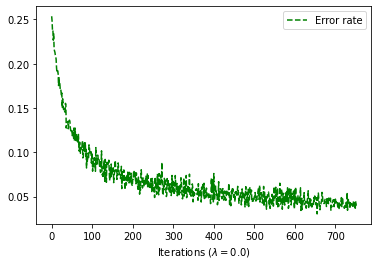

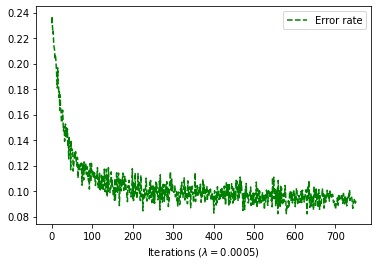

In [639]:

EPOCHS_in = 10 
BATCH_SIZE_in = 200
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

#without regularisation risque Overfitting

lambdavar=0.00

model_no_reg = Logistic_Reg_model(input_size)


print('Run training - without reg') 

Lists_Results=W2Rcore.W2R_fit(model_no_reg,X_bw_train,Titles_train, Gen_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar)+'_noreg.pdf')

#with regularisation risque Underfitting

lambdavar_r=0.0005

model_reg = Logistic_Reg_model(input_size)

print('Run training - with reg')
Lists_Results=W2Rcore.W2R_fit(model_reg,X_bw_train,Titles_train, Gen_train, lambdavar_r, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar_r)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar_r)+'_reg.pdf')




**Tests - without regularisation**

In [640]:

predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg,X_bw_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric

loss = error(predY_test, Titles_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)   
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])

mse = sum((y_pred_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse)

Accuracy=accuracy_score(y_true_np, y_pred_np)

y_pred_torch=torch.FloatTensor(y_pred_np)
y_pred_torch=y_pred_torch.reshape(y_pred_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_torch,y_true_torch,Gen_test,y_pred_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions')
W_score=result[1]

Loss (test data): tensor(0.0415)
DI: 0.1923039963407927
s0_RatioGoodPred: 0.9409306742640076
s1_RatioGoodPred: 0.9614980289093298
MSE : 0.0469126213592233


**Tests - with regularisation**

In [641]:
predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg,X_bw_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, Titles_test.float())
    
tmp_loss=loss.data 
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI_r=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI_r) 
    
tmp_cm_r=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)  
print('s0_RatioGoodPred:',tmp_cm_r['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm_r['s1_RatioGoodPred'])

mse_r = sum((y_pred_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse_r)

Accuracy_r=accuracy_score(y_true_np, y_pred_np)
print("Accuracy", Accuracy_r)

y_pred_torch=torch.FloatTensor(y_pred_np)
y_pred_torch=y_pred_torch.reshape(y_pred_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result_r=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_torch,y_true_torch,Gen_test,y_pred_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions')
W_score_r=result_r[1]

Loss (test data): tensor(0.0955)
DI: 0.1843403110200781
s0_RatioGoodPred: 0.9471984805318139
s1_RatioGoodPred: 0.9478318002628121
MSE : 0.05242718446601942
Accuracy 0.9475728155339805


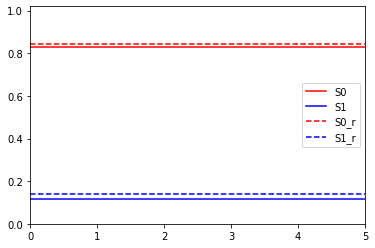

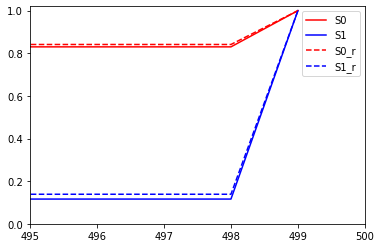

In [642]:
plt.figure()
plt.plot(result[2],'r',label="S0")
plt.plot(result[3],'b',label="S1")
plt.plot(result_r[2],'r--',label="S0_r")
plt.plot(result_r[3],'b--',label="S1_r")
plt.xlim(0, 5)
plt.ylim(0,1.02)
plt.legend()
plt.show()

plt.figure()
plt.plot(result[2],'r',label="S0")
plt.plot(result[3],'b',label="S1")
plt.plot(result_r[2],'r--',label="S0_r")
plt.plot(result_r[3],'b--',label="S1_r")
plt.xlim(495, 500)
plt.ylim(0,1.02)
plt.legend()
plt.show()

In [623]:
#lambda_=[]
#lambda_r=[]
#DI=[]
#DI_r=[]
#MSE=[]
#MSE_r=[]
#s0RGP=[]
#s1RGP=[]
#s0RGP_r=[]
#s1RGP_r=[]
#accuracy=[]
#accuracy_r=[]
#W=[]
#W_r=[]

In [624]:
lambda_.append(lambdavar)
lambda_r.append(lambdavar_r)

DI.append(tmp_DI)
DI_r.append(tmp_DI_r)

MSE.append(mse)
MSE_r.append(mse_r)

s0RGP.append(tmp_cm['s0_RatioGoodPred'])
s1RGP.append(tmp_cm['s1_RatioGoodPred']) 

s0RGP_r.append(tmp_cm_r['s0_RatioGoodPred'])
s1RGP_r.append(tmp_cm_r['s1_RatioGoodPred'])

accuracy.append(Accuracy)
accuracy_r.append(Accuracy_r)

W.append(W_score)
W_r.append(W_score_r)

## Visualization

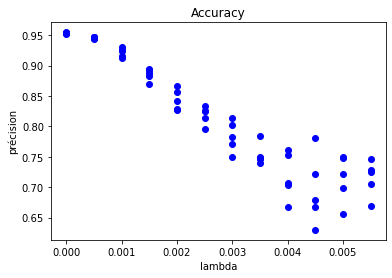

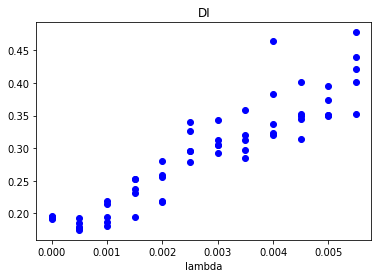

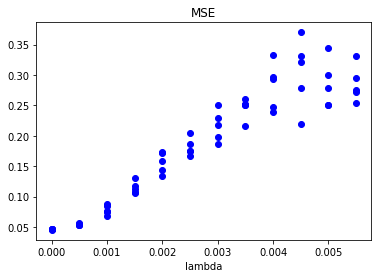

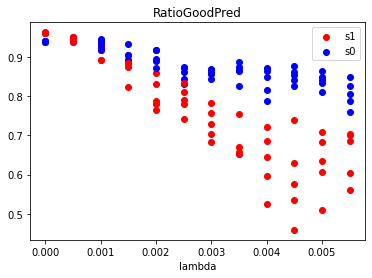

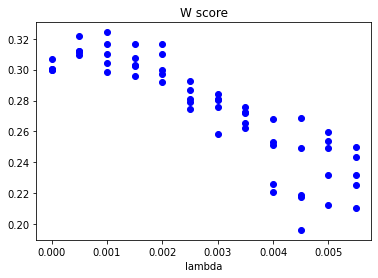

In [625]:
#Accuracy
plt.figure()
plt.scatter(lambda_, accuracy, color='blue')
plt.scatter(lambda_r, accuracy_r, color='blue')
plt.xlabel('lambda')
plt.ylabel('précision')
plt.title("Accuracy")
plt.savefig('Accuracy_reg.pdf')

#DI
plt.figure()
plt.scatter(lambda_, DI, color='blue')
plt.scatter(lambda_r, DI_r, color='blue')
plt.xlabel('lambda')
plt.title("DI")
plt.savefig('DI_reg.pdf')


#MSE
plt.figure()
plt.scatter(lambda_, MSE, color='blue')
plt.scatter(lambda_r, MSE_r, color='blue')
plt.xlabel('lambda')
plt.title("MSE")
plt.savefig('MSE_reg.pdf')

#Ratio good pred
plt.figure()
plt.scatter(lambda_, s1RGP, label="s1", color='red')
plt.scatter(lambda_, s0RGP, label="s0", color='blue')
plt.scatter(lambda_r, s0RGP_r, color='blue')
plt.scatter(lambda_r, s1RGP_r, color='red')
plt.xlabel('lambda')
plt.title("RatioGoodPred")
plt.legend()
plt.savefig('RatioGoodPred_reg.pdf')

#W score
plt.figure()
plt.scatter(lambda_, W, color='blue')
plt.scatter(lambda_r, W_r, color='blue')
plt.xlabel('lambda')
plt.title("W score")
plt.savefig('W_reg.pdf')
           


## Without gender information

In [643]:
#parametres

input_size = len(X_bw_nogen_train[0])
#print(input_size) pourquoi 1006 et pas 1000
opti_lr = 1e-3 #le pas d'apprentissage

Run training - without reg
epoch 0 -- batchNb 1: 0.23349373 0.0 --  lambda=0.0
epoch 0 -- batchNb 2: 0.23095092 0.0 --  lambda=0.0
epoch 0 -- batchNb 3: 0.22170943 0.0 --  lambda=0.0
epoch 0 -- batchNb 4: 0.22310704 0.0 --  lambda=0.0
epoch 0 -- batchNb 5: 0.22358853 0.0 --  lambda=0.0
epoch 0 -- batchNb 6: 0.21145359 0.0 --  lambda=0.0
epoch 0 -- batchNb 7: 0.20727067 0.0 --  lambda=0.0
epoch 0 -- batchNb 8: 0.20523433 0.0 --  lambda=0.0
epoch 0 -- batchNb 9: 0.1964127 0.0 --  lambda=0.0
epoch 0 -- batchNb 10: 0.18848442 0.0 --  lambda=0.0
epoch 0 -- batchNb 11: 0.1994563 0.0 --  lambda=0.0
epoch 0 -- batchNb 12: 0.195489 0.0 --  lambda=0.0
epoch 0 -- batchNb 13: 0.18709351 0.0 --  lambda=0.0
epoch 0 -- batchNb 14: 0.18162951 0.0 --  lambda=0.0
epoch 0 -- batchNb 15: 0.18039493 0.0 --  lambda=0.0
epoch 0 -- batchNb 16: 0.18176772 0.0 --  lambda=0.0
epoch 0 -- batchNb 17: 0.1836338 0.0 --  lambda=0.0
epoch 0 -- batchNb 18: 0.17878646 0.0 --  lambda=0.0
epoch 0 -- batchNb 19: 0.17516996

epoch 3 -- batchNb 24: 0.05854428 0.0 --  lambda=0.0
epoch 3 -- batchNb 25: 0.055346083 0.0 --  lambda=0.0
epoch 3 -- batchNb 26: 0.059427585 0.0 --  lambda=0.0
epoch 3 -- batchNb 27: 0.054945525 0.0 --  lambda=0.0
epoch 3 -- batchNb 28: 0.056770332 0.0 --  lambda=0.0
epoch 3 -- batchNb 29: 0.062260557 0.0 --  lambda=0.0
epoch 3 -- batchNb 30: 0.0573975 0.0 --  lambda=0.0
epoch 3 -- batchNb 31: 0.056590125 0.0 --  lambda=0.0
epoch 3 -- batchNb 32: 0.057828777 0.0 --  lambda=0.0
epoch 4 -- batchNb 1: 0.053356133 0.0 --  lambda=0.0
epoch 4 -- batchNb 2: 0.05326359 0.0 --  lambda=0.0
epoch 4 -- batchNb 3: 0.060244884 0.0 --  lambda=0.0
epoch 4 -- batchNb 4: 0.05421579 0.0 --  lambda=0.0
epoch 4 -- batchNb 5: 0.058778826 0.0 --  lambda=0.0
epoch 4 -- batchNb 6: 0.053143512 0.0 --  lambda=0.0
epoch 4 -- batchNb 7: 0.058099963 0.0 --  lambda=0.0
epoch 4 -- batchNb 8: 0.054185092 0.0 --  lambda=0.0
epoch 4 -- batchNb 9: 0.059169464 0.0 --  lambda=0.0
epoch 4 -- batchNb 10: 0.052423097 0.0 -- 

epoch 1 -- batchNb 5: 0.11657408 0.060726339415533036 --  lambda=0.0005
epoch 1 -- batchNb 6: 0.11603744 0.12490378008412091 --  lambda=0.0005
epoch 1 -- batchNb 7: 0.11280914 0.11887635533100077 --  lambda=0.0005
epoch 1 -- batchNb 8: 0.1142521 0.09931543834902033 --  lambda=0.0005
epoch 1 -- batchNb 9: 0.11497551 0.1096399505665383 --  lambda=0.0005
epoch 1 -- batchNb 10: 0.10797122 0.059984960223206686 --  lambda=0.0005
epoch 1 -- batchNb 11: 0.10590148 0.10825843197561329 --  lambda=0.0005
epoch 1 -- batchNb 12: 0.11621999 0.12683729308916053 --  lambda=0.0005
epoch 1 -- batchNb 13: 0.10530918 0.09471998066330525 --  lambda=0.0005
epoch 1 -- batchNb 14: 0.11823405 0.11353390511956994 --  lambda=0.0005
epoch 1 -- batchNb 15: 0.10904203 0.09918200325130329 --  lambda=0.0005
epoch 1 -- batchNb 16: 0.11116753 0.08361753810035524 --  lambda=0.0005
epoch 1 -- batchNb 17: 0.10936661 0.0729713153114641 --  lambda=0.0005
epoch 1 -- batchNb 18: 0.11314941 0.08263772147423258 --  lambda=0.000

epoch 2 -- batchNb 24: 0.10973785 0.1342682407132595 --  lambda=0.0005
epoch 2 -- batchNb 25: 0.102721415 0.09619271760717443 --  lambda=0.0005
epoch 2 -- batchNb 26: 0.102063954 0.09538265090678438 --  lambda=0.0005
epoch 2 -- batchNb 27: 0.10056592 0.11291613422210295 --  lambda=0.0005
epoch 2 -- batchNb 28: 0.10315945 0.10698316411140002 --  lambda=0.0005
epoch 2 -- batchNb 29: 0.10042017 0.10513898458635942 --  lambda=0.0005
epoch 2 -- batchNb 30: 0.0998642 0.11470540868782313 --  lambda=0.0005
epoch 2 -- batchNb 31: 0.10977543 0.10677957797013188 --  lambda=0.0005
epoch 2 -- batchNb 32: 0.0990534 0.1253975053302113 --  lambda=0.0005
epoch 3 -- batchNb 1: 0.103027835 0.15343820409339043 --  lambda=0.0005
epoch 3 -- batchNb 2: 0.099373765 0.07818961314308838 --  lambda=0.0005
epoch 3 -- batchNb 3: 0.10303548 0.06968828305012033 --  lambda=0.0005
epoch 3 -- batchNb 4: 0.1000581 0.1202981086524155 --  lambda=0.0005
epoch 3 -- batchNb 5: 0.10454757 0.15553552469197104 --  lambda=0.0005

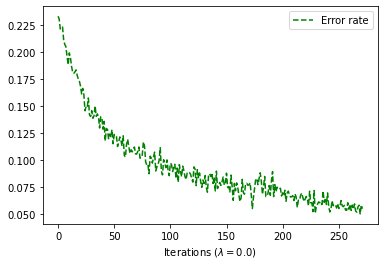

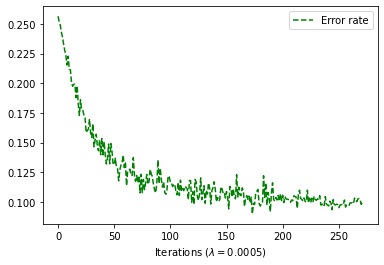

In [644]:

EPOCHS_in = 5 
BATCH_SIZE_in = 200 
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')  

#without regularisation risque Overfitting

model_no_reg_nogen = Logistic_Reg_model(input_size)


print('Run training - without reg') 

Lists_Results_nogen=W2Rcore.W2R_fit(model_no_reg_nogen,X_bw_nogen_train,Titles_train, Gen_train, lambdavar, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results_nogen['Acc'],'g--',label='Error rate')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar)+'_noreg.pdf')

#with regularisation risque Underfitting

model_reg_nogen = Logistic_Reg_model(input_size)

print('Run training - with reg')
Lists_Results_nogen=W2Rcore.W2R_fit(model_reg_nogen,X_bw_nogen_train,Titles_train, Gen_train, lambdavar_r, EPOCHS = EPOCHS_in, BATCH_SIZE = BATCH_SIZE_in,obs_for_histo=50,DistBetween='All_predictions',DEVICE=DEVICE)

plt.figure()
plt.plot(Lists_Results_nogen['Acc'],'g--',label='Error rate')
#plt.plot(lambdavar*np.array(Lists_Results['W2']),'r-',label='$\lambda$*W2')
plt.xlabel('Iterations ($\lambda=$'+str(lambdavar_r)+')')
plt.legend()
plt.savefig('Convergence_'+str(lambdavar_r)+'_reg.pdf')


**Tests - with regularisation**

Loss (test data): tensor(0.2178)
DI: 0.44562230298388256
{'s0_total': 5265.0, 's0_TP': 0.6778115501519757, 's0_FP': 0.19730844367267203, 's0_TN': 0.802691556327328, 's0_FN': 0.3221884498480243, 's0_RatioGoodPred': 0.7870845204178537, 's1_total': 7610.0, 's1_TP': 0.6344969199178645, 's1_FP': 0.08712121212121213, 's1_TN': 0.9128787878787878, 's1_FN': 0.3655030800821355, 's1_RatioGoodPred': 0.6634691195795006}
s0_RatioGoodPred: 0.7870845204178537
s1_RatioGoodPred: 0.6634691195795006
MSE : 0.28598058252427183


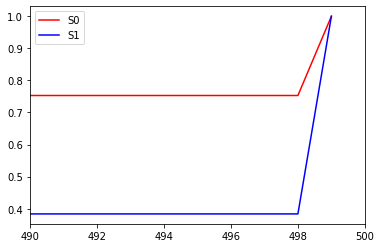

In [628]:
predY_nogen_test=torch.clone(W2Rcore.LargeDatasetPred(model_no_reg_nogen,X_bw_nogen_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric

loss = error(predY_nogen_test, Titles_test.float())
    
tmp_loss=loss.data
print('Loss (test data): '+str(tmp_loss))
            
y_pred_nogen_np=1*(predY_nogen_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI=W2Rmisc.compute_disparate_impact(y_pred_nogen_np, S_np)
print('DI:',tmp_DI)
    
tmp_cm=W2Rmisc.cpt_BasicDescrStats(y_pred_nogen_np, y_true_np, S_np)
print(tmp_cm)   
print('s0_RatioGoodPred:',tmp_cm['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm['s1_RatioGoodPred'])

mse = sum((y_pred_nogen_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse)

Accuracy=accuracy_score(y_true_np, y_pred_nogen_np)

y_pred_nogen_torch=torch.FloatTensor(y_pred_nogen_np)
y_pred_nogen_torch=y_pred_torch.reshape(y_pred_nogen_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_nogen_torch,y_true_torch,Gen_test,y_pred_nogen_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions',show_histos=True)
W_score=result[1]

**Tests - without regularisation**

In [629]:
predY_test=torch.clone(W2Rcore.LargeDatasetPred(model_reg_nogen,X_bw_nogen_test.float(),10000,DEVICE=DEVICE))  #prediction made with blocks of 10000 observations to make sure we won't saturate the memory
    
error = nn.MSELoss()  #does not take into account the W2 metric
loss = error(predY_test, Titles_test.float())
    
tmp_loss=loss.data #fonction coût, loss est un scalaire elle doit tendre vers 0
print('Loss (test data): '+str(tmp_loss))
            
y_pred_np=1*(predY_test.view(-1).data.numpy()>0.5)
y_true_np=1*(Titles_test.view(-1).data.numpy()>0.5)
S_np=Gen_test[:]
    
tmp_DI_r=W2Rmisc.compute_disparate_impact(y_pred_np, S_np)
print('DI:',tmp_DI_r) #DI = disparate_impact
    
tmp_cm_r=W2Rmisc.cpt_BasicDescrStats(y_pred_np, y_true_np, S_np)
#print(tmp_cm)  
print('s0_RatioGoodPred:',tmp_cm_r['s0_RatioGoodPred'])
print('s1_RatioGoodPred:',tmp_cm_r['s1_RatioGoodPred'])


mse_r = sum((y_pred_np-y_true_np)**2) / len(y_true_np)
print("MSE :",mse)

Accuracy_r=accuracy_score(y_true_np, y_pred_np)

y_pred_torch=torch.FloatTensor(y_pred_np)
y_pred_torch=y_pred_torch.reshape(y_pred_torch.shape[0],1)
y_true_torch=torch.FloatTensor(y_true_np)
y_true_torch=y_pred_torch.reshape(y_true_torch.shape[0],1)

result=W2Rcore.EstimGrad_W2dist(Gen_test,y_pred_torch,y_true_torch,Gen_test,y_pred_torch,y_true_torch, NbBins=500,ID_TreatedVar=0,DistBetween='All predictions')
W_score_r=result[1]

Loss (test data): tensor(0.2157)
DI: 0.3287736878085331
s0_RatioGoodPred: 0.8558404558404559
s1_RatioGoodPred: 0.6559789750328515
MSE : 0.28598058252427183


In [630]:
#lambda_nogen=[]
#lambda_nogen_r=[]
#DI_nogen=[]
#DI_nogen_r=[]
#MSE_nogen=[]
#MSE_nogen_r=[]
#s0RGP_nogen=[]
#s1RGP_nogen=[]
#s0RGP_nogen_r=[]
#s1RGP_nogen_r=[]
#accuracy_nogen=[]
#accuracy_nogen_r=[]
#W_nogen=[]
#W_nogen_r=[]

In [631]:
lambda_nogen.append(lambdavar)
lambda_nogen_r.append(lambdavar_r)

DI_nogen.append(tmp_DI)
DI_nogen_r.append(tmp_DI_r)

MSE_nogen.append(mse)
MSE_nogen_r.append(mse_r)

s0RGP_nogen.append(tmp_cm['s0_RatioGoodPred'])
s1RGP_nogen.append(tmp_cm['s1_RatioGoodPred']) 

s0RGP_nogen_r.append(tmp_cm_r['s0_RatioGoodPred'])
s1RGP_nogen_r.append(tmp_cm_r['s1_RatioGoodPred'])

W_nogen.append(W_score)
W_nogen_r.append(W_score_r)

accuracy_nogen.append(Accuracy)
accuracy_nogen_r.append(Accuracy_r)

## Visualization

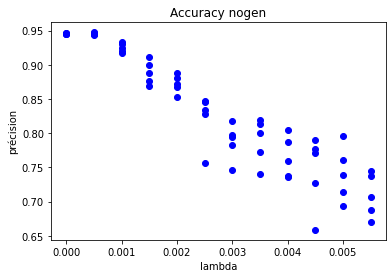

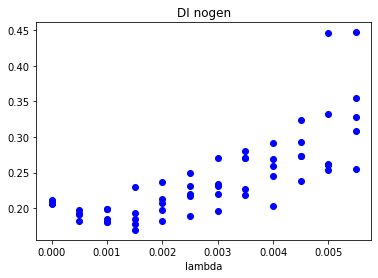

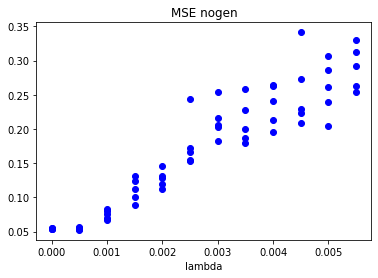

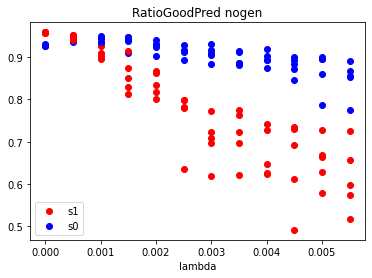

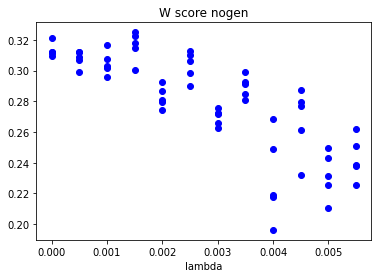

In [632]:
#Accuracy
plt.figure()
plt.scatter(lambda_nogen, accuracy_nogen, color='blue')
plt.scatter(lambda_nogen_r, accuracy_nogen_r, color='blue')
plt.xlabel('lambda')
plt.ylabel('précision')
plt.title("Accuracy nogen")
plt.savefig('Accuracy_nogen_reg.pdf')

#DI
plt.figure()
plt.scatter(lambda_nogen, DI_nogen, color='blue')
plt.scatter(lambda_nogen_r, DI_nogen_r, color='blue')
plt.xlabel('lambda')
plt.title("DI nogen")
plt.savefig('DI_nogen_reg.pdf')

#MSE
plt.figure()
plt.scatter(lambda_nogen, MSE_nogen, color='blue')
plt.scatter(lambda_nogen_r, MSE_nogen_r, color='blue')
plt.xlabel('lambda')
plt.title("MSE nogen")
plt.savefig('MSE_nogen_reg.pdf')

#Ratio good pred
plt.figure()
plt.scatter(lambda_nogen, s1RGP_nogen, label="s1", color='red')
plt.scatter(lambda_nogen, s0RGP_nogen, label="s0", color='blue')
plt.scatter(lambda_nogen_r, s0RGP_nogen_r, color='blue')
plt.scatter(lambda_nogen_r, s1RGP_nogen_r, color='red')
plt.xlabel('lambda')
plt.title("RatioGoodPred nogen")
plt.legend()
plt.savefig('RatioGoodPred_nogen_reg.pdf')

#W score
plt.figure()
plt.scatter(lambda_nogen, W_nogen, color='blue')
plt.scatter(lambda_nogen_r, W_nogen_r, color='blue')
plt.xlabel('lambda')
plt.title("W score nogen")
plt.savefig('W_nogen_reg.pdf')